In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# Feature Engineering packages 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Sipplitting package 
from sklearn.model_selection import train_test_split

# scaler packages 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Regression packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

# Classification packages 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



# Grid search, random search packages  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#Pipeline packages
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

### Read the dataset

In [3]:
df = pd.read_csv('/Users/macbookpro/Desktop/Tadawul_stcks_clean.csv')

In [4]:
df.head()

,trading_name,sector,date,open_price,high_price,low_price,close_price,change,perc_Change,volume_traded,value_traded,num_trades,Year,month,day,Change_category
0,SARCO,Energy,2020-03-05,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0,2020,March,Thursday,Bad Change
1,SARCO,Energy,2020-03-04,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0,2020,March,Wednesday,Good Change
2,SARCO,Energy,2020-03-03,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0,2020,March,Tuesday,Good Change
3,SARCO,Energy,2020-03-02,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0,2020,March,Monday,Bad Change
4,SARCO,Energy,2020-03-01,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,1625.0,2020,March,Sunday,Bad Change


# ---------------------------------------------------------------------------------
# ML model
## Select the features and target

In [5]:
# set our features 
cal_fatures= ['open_price', 'close_price', 'high_price', 'low_price']

#Set our target which is the the close price  
cal_target= ['Change_category']

X= df[cal_fatures] 
y= df[cal_target]

## Standard scaler 

In [6]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

## Split the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Basline model
### Dummy Classifier 

In [8]:
dummy1 = DummyClassifier() 
dummy1.fit(X_train, y_train)
y_pred_dum = dummy1.predict(X_test)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


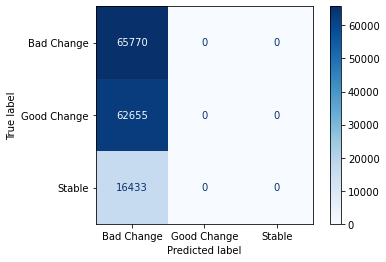

In [9]:
plot_confusion_matrix(dummy1, X=X_test, y_true=y_test, cmap='Blues')

In [10]:
print(classification_report(y_test, y_pred_dum))

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

  Bad Change       0.45      1.00      0.62     65770
 Good Change       0.00      0.00      0.00     62655
      Stable       0.00      0.00      0.00     16433

    accuracy                           0.45    144858
   macro avg       0.15      0.33      0.21    144858
weighted avg       0.21      0.45      0.28    144858



/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### The f1 Weighted avg score equal 28% on the baseline model. In the next models we will try to increase it. 

# Train Model

### 1st Logistic Regression Model 

In [11]:
# Create and fit our model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# Make prediction based on the test set
y_pred = classifier.predict(X_test)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## --------------------------------------------------------------------------------------

## 2nd Random Forest classifier

In [12]:
# Create and fit the model 
clas_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
clas_forest.fit(X_train, y_train)
# Make orediction besed on the test set
preds_ran = clas_forest.predict(X_test)

/var/folders/hc/tyrx0wvn7xg0rddmx0s834pc0000gn/T/ipykernel_13116/1045027924.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clas_forest.fit(X_train, y_train)


## --------------------------------------------------------------------------------------

## 3rd KNN classifier 

In [13]:
# Create and fit the model 
clas_knn = KNeighborsClassifier()
clas_knn.fit(X_train, y_train)
# Make prediction based on the test set 
preds_knn = clas_knn.predict(X_test)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## --------------------------------------------------------------------------------------

## 4th Gradient Boosting Classifier

In [14]:
# Create and fit the model 
gbc = GradientBoostingClassifier( n_estimators=100, random_state=42)

gbc.fit(X_train, y_train)
# Make predection based on the test set 
y_pred_GBC = gbc.predict(X_test)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# -------------------------------------------------------------------------------------------

## Model Evaluation
####  This should include confusion matrix and classification report 

In [15]:
def cost_function(pred):
    print("Model accuracy:",accuracy_score(X_test, y_pred))
    print("percision score:",precision_score(y_test, y_pred))
    print("recall score:", recall_score(y_test, y_pred))
    print("f1 score:", f1_score(y_test, y_pred))

### 1st Model Evaluation - Logistic Regression Model

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


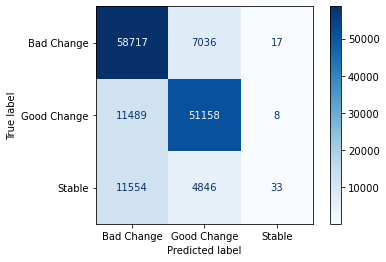

In [96]:
# Create the confusion matrix of logistic regression model 
plot_confusion_matrix(classifier, X=X_test, y_true=y_test, cmap='Blues')

In [77]:
# Print our classification model report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Bad Change       0.72      0.89      0.80     65770
 Good Change       0.81      0.82      0.81     62655
      Stable       0.57      0.00      0.00     16433

    accuracy                           0.76    144858
   macro avg       0.70      0.57      0.54    144858
weighted avg       0.74      0.76      0.71    144858



#### The output:
#### Here we focus on the f1 Weighted Avg which is equal 71% which is higher than the baseline model 

## -------------------------------------------------------------------------------------------

### 2nd Model Evaluation - Random Forest Model

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


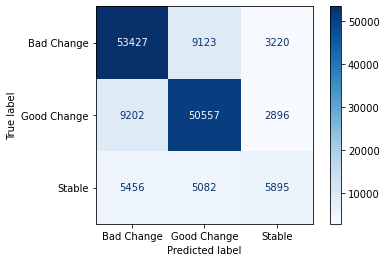

In [98]:
# View the confusion matrix of the random forest model
plot_confusion_matrix(clas_forest, X_test, y_test,cmap='Blues');

In [99]:
# Print the classification report 
print(classification_report(y_test, preds_ran))

              precision    recall  f1-score   support

  Bad Change       0.78      0.81      0.80     65770
 Good Change       0.78      0.81      0.79     62655
      Stable       0.49      0.36      0.41     16433

    accuracy                           0.76    144858
   macro avg       0.69      0.66      0.67    144858
weighted avg       0.75      0.76      0.75    144858



#### The output:
####  f1 weighted evg equal 75% , which is higher than the baseline model and the logistic regression model 

## -------------------------------------------------------------------------------------------

### 3rd Model Evaluation - KNN Classifier 

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


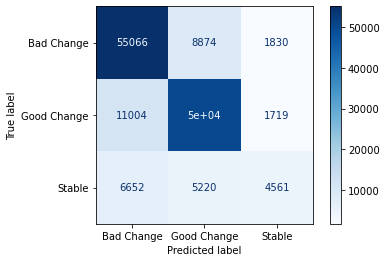

In [100]:
# plot the confusion matrix 
plot_confusion_matrix(clas_knn, X_test, y_test,cmap='Blues');

In [101]:
# Print the classification report 
print(classification_report(y_test, preds_knn))

              precision    recall  f1-score   support

  Bad Change       0.76      0.84      0.80     65770
 Good Change       0.78      0.80      0.79     62655
      Stable       0.56      0.28      0.37     16433

    accuracy                           0.76    144858
   macro avg       0.70      0.64      0.65    144858
weighted avg       0.74      0.76      0.74    144858



#### The output:
#### f1 weighted evg equal 74% , which is higher than the baseline the logistic regression model, but lower than the random forest 


## -------------------------------------------------------------------------------------------

### 4th Model Evaluation - Gradient Boosting Classifier  

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


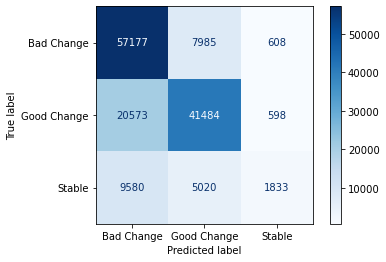

In [48]:
# plot the confusion matrix 
plot_confusion_matrix(gbc, X_test, y_test,cmap='Blues');

In [49]:
# Print the classification report 
print(classification_report(y_test, y_pred_GBC))

              precision    recall  f1-score   support

  Bad Change       0.65      0.87      0.75     65770
 Good Change       0.76      0.66      0.71     62655
      Stable       0.60      0.11      0.19     16433

    accuracy                           0.69    144858
   macro avg       0.67      0.55      0.55    144858
weighted avg       0.69      0.69      0.67    144858



#### The output:
#### As the KNN classifier model, the f1 weighted evg equal 67% , which is higher than the baseline model lower than the the other models 


## Evaluation results summary 

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and wi

Text(0.5, 1.0, 'Gradient boosting Classifier Results')

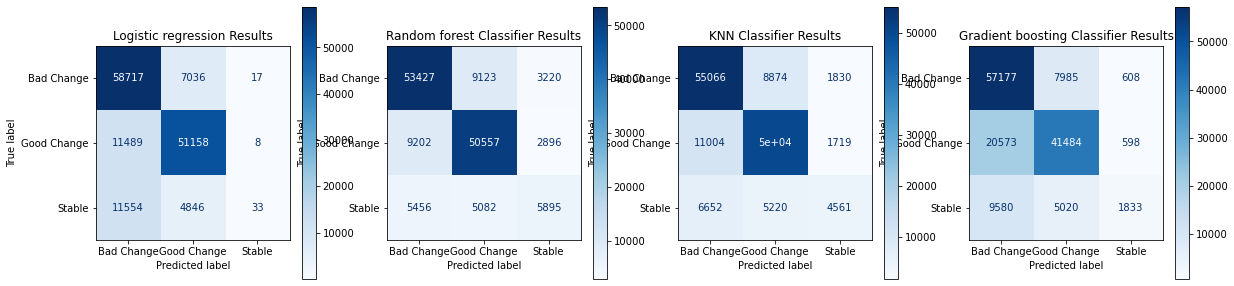

In [17]:
f, axes = plt.subplots(1, 4, figsize=(20, 5))

disp_classi = plot_confusion_matrix(classifier, X_test, y_test, ax= axes[0], cmap='Blues')
disp_classi.ax_.set_title('Logistic regression Results')

disp_forest = plot_confusion_matrix(clas_forest, X_test, y_test, ax= axes[1], cmap='Blues')
disp_forest.ax_.set_title('Random forest Classifier Results')

disp_knn = plot_confusion_matrix(clas_knn, X_test, y_test, ax= axes[2], cmap='Blues')
disp_knn.ax_.set_title('KNN Classifier Results')

disp_gbc = plot_confusion_matrix(gbc, X_test, y_test, ax= axes[3], cmap='Blues')
disp_gbc.ax_.set_title('Gradient boosting Classifier Results')

In [93]:
# Create a data fram to display all the results 
df_perf_metrics = pd.DataFrame(columns=['Model','Accuracy','Recall', 'precision', 'F1 score'])
model_name = ['Baseline model', 'Logistic Regression',  'Random Forest', 'KNN' , 'GBC']
models = [dummy1, classifier, clas_forest, clas_knn, gbc]
model_pred = [y_pred_dum, y_pred, preds_ran, preds_knn, y_pred_GBC]

def get_perf_metrics(model, n):

    df_perf_metrics.loc[n] = [
        model_name[n],
        models[n].score(X_test, y_test),
        precision_score(y_test,  model_pred[n],  average="weighted"),
        recall_score(y_test,  model_pred[n],  average="weighted"),
        f1_score(y_test,  model_pred[n],  average="weighted")
    ]
        
                
for n, model in enumerate(model_name):
    get_perf_metrics(model, n)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
df_perf_metrics

,Model,Accuracy,Recall,precision,F1 score
0,Baseline model,0.454031,0.206144,0.454031,0.283548
1,Logistic Regression,0.758729,0.741616,0.758729,0.713941
2,Random Forest,0.758529,0.749616,0.758529,0.752706
3,KNN,0.756320,0.744912,0.756320,0.744185
4,GBC,0.693741,0.694983,0.693741,0.666824


## -------------------------------------------------------------------------------------------

## Model Selection 
### After we created  five classification models ( Logistic Regression, Random Forest, KNN, GBC  ), and based on the previos results we selected the random forest model as the best model since it gives us the highest f1 weighted avg score = 75% 

## Model Optimization - Hyperparameter Tuning 

### Random search for random forest model - Best Model

In [19]:
parameters ={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 80, 100]}


random_search = RandomizedSearchCV(clas_forest, # Model
                    parameters, # Parameters to tune
                    cv=5, # Cross Validation
                    verbose=1, # Shows output while training 
                    n_jobs=-1, # How many core to use on your computer (-1 means use all cores)
                    scoring="accuracy"
                   )

In [20]:
# Fit the model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selec

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 80, 100]},
                   scoring='accuracy', verbose=1)

### Model Evaluation 

In [44]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


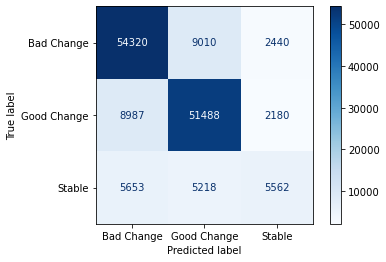

In [34]:
plot_confusion_matrix(random_search, X_test, y_test,cmap='Blues');

In [56]:
# Make prediction based on the test set
preds_random = random_search.predict(X_test)
# Print the classification report 
print(classification_report(y_test, preds_random))

              precision    recall  f1-score   support

  Bad Change       0.79      0.83      0.81     65770
 Good Change       0.78      0.82      0.80     62655
      Stable       0.55      0.34      0.42     16433

    accuracy                           0.77    144858
   macro avg       0.71      0.66      0.68    144858
weighted avg       0.76      0.77      0.76    144858



## --------------------------------------------------------------------------------------

# ML Pipeline for Best Model - Random Forest Calssifier 

In [52]:
numeric_features = X_train.describe().columns 

# Create a transformer for numeric columns
numeric_transformer = Pipeline(
    steps=[
        # missing values --> by default mean 
        ('scaler', StandardScaler())
    ]
)

# Create the model using the best parameters 
Random_regression = Pipeline(
    steps=[
        ('Randomregression', RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 1,
                                                     max_features= 'sqrt'))
    ]
)

In [53]:
# Fit the model 
Random_regression.fit(X_train, y_train)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py:382: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('Randomregression',
                 RandomForestClassifier(min_samples_split=10))])

## Model evaluation

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


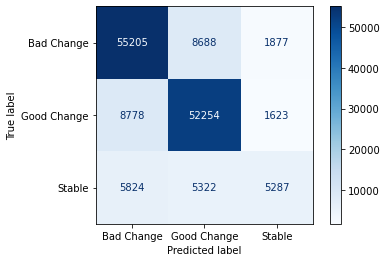

In [54]:
plot_confusion_matrix(Random_regression, X_test, y_test,cmap='Blues');

In [55]:
# Make prediction based on the test set 
pip_pred = Random_regression.predict(X_test)

# print the classification report 
print(classification_report(y_test, pip_pred))

              precision    recall  f1-score   support

  Bad Change       0.79      0.84      0.81     65770
 Good Change       0.79      0.83      0.81     62655
      Stable       0.60      0.32      0.42     16433

    accuracy                           0.78    144858
   macro avg       0.73      0.67      0.68    144858
weighted avg       0.77      0.78      0.77    144858



## Evaluation Summary after random search 

In [38]:
# Create a data fram to display all the results 
df_perf_metrics2 = pd.DataFrame(columns=['Model','Accuracy','Recall', 'precision', 'F1 score'])
model_name = ['Baseline model', 'Logistic Regression',  'Random Forest with tuning', 'KNN' , 'GBC']
models = [dummy1, classifier, Random_regression, clas_knn, gbc]
model_pred = [y_pred_dum, y_pred, preds_random, preds_knn, y_pred_GBC]

def get_perf_metrics2(model, n):

    df_perf_metrics2.loc[n] = [
        model_name[n],
        models[n].score(X_test, y_test),
        precision_score(y_test,  model_pred[n],  average="weighted"),
        recall_score(y_test,  model_pred[n],  average="weighted"),
        f1_score(y_test,  model_pred[n],  average="weighted")
    ]
        
                
for n, model in enumerate(model_name):
    get_perf_metrics2(model, n)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
df_perf_metrics2

,Model,Accuracy,Recall,precision,F1 score
0,Baseline model,0.454031,0.206144,0.454031,0.283548
1,Logistic Regression,0.758729,0.741616,0.758729,0.713941
2,Random Forest with tuning,0.750956,0.758492,0.768822,0.760486
3,KNN,0.756320,0.744912,0.756320,0.744185
4,GBC,0.693741,0.694983,0.693741,0.666824


### Summary of our findings:
#### We have tried several classification models to come up with the best model that can predict the change category depending on the high price, low price, open price, and close price. 

#### We found that the Random forest is the best model, as it achieved the highest weighted avg of f1 with 76%. It is followed by KNN, which achieved 74% of the weighted avg. Followed by the Logistic regression which achieved 71%, the worst model is the gradient boosting  with 71% of weighted avg

#### We select the Random forest as the best model based on the highest weighted avg of f1